# Notebook to see what kind of images we can generate to show muscle activity over time

Franesca has tried variance image which doesn't seem to work very well, but maybe there's an alternative?

In [22]:
import os
import sys
import h5py

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [23]:
fig_size = (9,9)

## Load image data

In [24]:
# define the fly number and side (left/right) we're looking at
fly_db_path = '/media/sam/SamData/FlyDB'
fly_num = 35
side = 'left'


In [25]:
# read in data from hdf5
img_path = os.path.join(fly_db_path, 'Fly%04d'%(fly_num), 'ca_camera_%s.hdf5'%(side))

with h5py.File(img_path, 'r') as f:
    imgs = f['cam_imgs'][:]

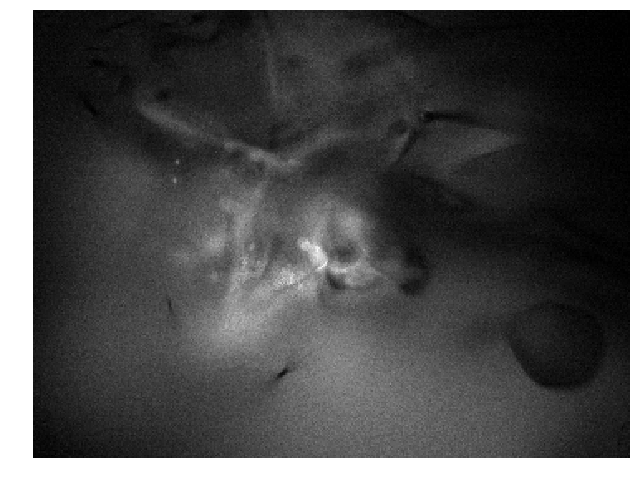

In [26]:
# test that we've loaded in the corect images
fig, ax = plt.subplots(figsize=fig_size)

ax.imshow(np.squeeze(imgs[0,:,:]), cmap='gray')
ax.axis('off')
plt.tight_layout()


In [27]:
print(imgs[0,:,:].shape)

(270, 360)


## First just reproduce variance image result

In [28]:
# calculate variance image
img_var = np.var(imgs, axis=0)


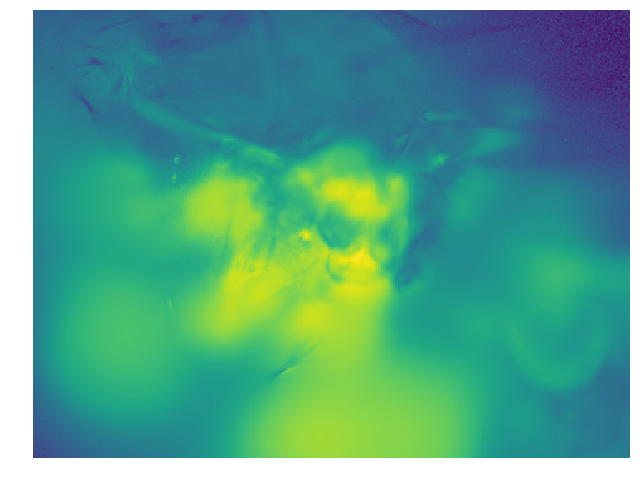

In [29]:
# see what that looks like
fig, ax = plt.subplots(figsize=fig_size)

ax.imshow(np.log(img_var))
# ax.imshow(img_var)
ax.axis('off')
plt.tight_layout()

## What does the median image look like (maybe a good bg signal?)

In [30]:
# get median image
img_median = np.median(imgs, axis=0)


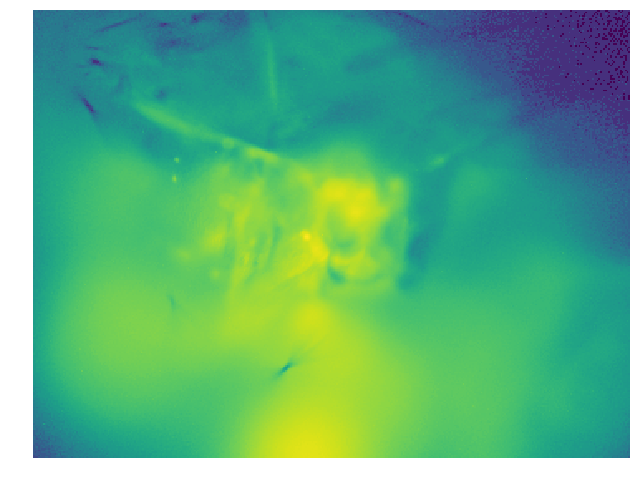

In [31]:
# see what that looks like
fig, ax = plt.subplots(figsize=fig_size)

ax.imshow(np.log(img_median))
ax.axis('off')
plt.tight_layout()

In [32]:
# convert median image to 8bit int
img_median = np.uint8(img_median)

In [33]:
# does subtracting this off improve the signal?
imgs_median_sub = imgs.copy()
for ith in range(imgs_median_sub.shape[0]):
    imgs_median_sub[ith,:,:] = cv2.subtract(imgs_median_sub[ith,:,:], img_median)

# calculate new variance image
img_median_sub_var = np.var(imgs_median_sub, axis=0)


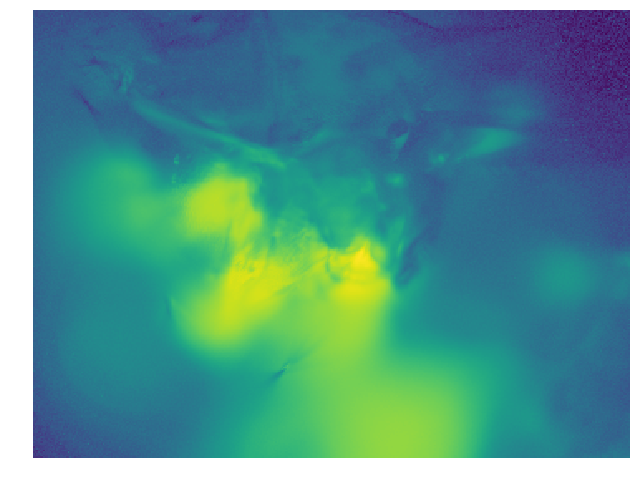

In [34]:
# see what that looks like
fig, ax = plt.subplots(figsize=fig_size)

ax.imshow(np.log(img_median_sub_var))
# ax.imshow(img_median_sub_var)
ax.axis('off')
plt.tight_layout()

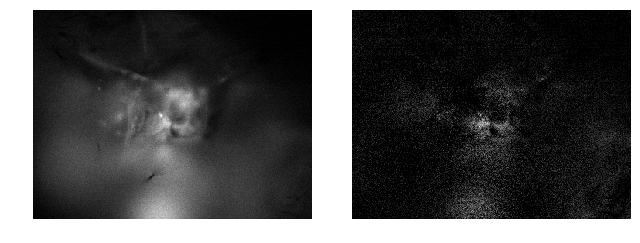

In [35]:
# also look at just a regular image
img_ind = 1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=fig_size)

ax1.imshow(np.squeeze(imgs[img_ind,:,:]), cmap='gray')
ax1.axis('off')
ax2.imshow(np.squeeze(imgs_median_sub[img_ind,:,:]), cmap='gray')
ax2.axis('off')

plt.tight_layout()

## What does maximum image look like?

In [36]:
# calculate max image
img_max = np.max(imgs, axis=0)

# also get min image
img_min = np.min(imgs, axis=0)

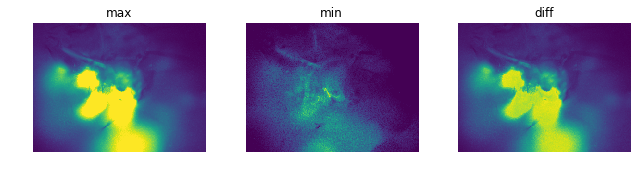

In [37]:
# see what these looks like
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=fig_size)

ax1.imshow(img_max.astype('float'))
ax1.axis('off')
ax1.set_title('max')

ax2.imshow(img_min.astype('float'))
ax2.axis('off')
ax2.set_title('min')

img_diff = cv2.subtract(img_max, img_min)
ax3.imshow(img_diff.astype('float'))
ax3.axis('off')
ax3.set_title('diff')

plt.tight_layout()

## What does mean image look like?

In [38]:
# calculate mean image
img_mean = np.mean(imgs, axis=0)

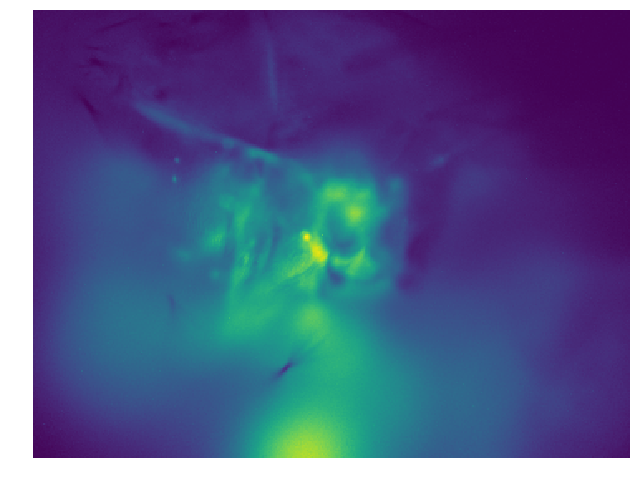

In [39]:
# see what that looks like
fig, ax = plt.subplots(figsize=fig_size)

ax.imshow(img_mean)
ax.axis('off')
plt.tight_layout()